## Problem Statement

The main goal of this project is to detect and thereby prevent fraudulent transactions carrried out with credit and debit cards.
 

Here, will analyse customer-level data that has been collected and analysed during a research collaboration of Worldline and the Machine Learning Group. 

 

The data set is taken from the Kaggle website and has a total of 2,84,807 transactions; out of these, 492 are fraudulent. Since the data set is highly imbalanced, it needs to be handled before model building.

==================================================================================================================

## Business problem overview
For many banks, retaining high profitable customers is the number one business goal. Banking fraud, however, poses a significant threat to this goal for different banks. In terms of substantial financial losses, trust and credibility, this is a concerning issue to both banks and customers alike.


It has been estimated by Nilson Report that by 2020, banking frauds would account for $30 billion worldwide. With the rise in digital payment channels, the number of fraudulent transactions is also increasing in new and different ways. 

 

In the banking industry, credit card fraud detection using machine learning is not only a trend but a necessity for them to put proactive monitoring and fraud prevention mechanisms in place. Machine learning is helping these institutions to reduce time-consuming manual reviews, costly chargebacks and fees as well as denials of legitimate transactions.

==================================================================================================================
## Understanding and defining fraud

Credit card fraud is any dishonest act or behaviour to obtain information without proper authorisation from the account holder for financial gain. Among different ways of committing frauds, skimming is the most common one, which is a way of duplicating information that is located on the magnetic strip of the card. Apart from this, following are the other ways:

1. Manipulation/alteration of genuine cards
2. Creation of counterfeit cards
3. Stealing/loss of credit cards
4. Fraudulent telemarketing


In [12]:
#Importing libraries

#import general libraries
import pandas as pd
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
from sklearn.preprocessing import PowerTransformer
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix
from imblearn import over_sampling 

#import modelling library
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier

#import Cross Validation library
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn import metrics


import warnings
warnings.filterwarnings("ignore")

In [14]:
#loadin data
data = pd.read_csv(r"C:\Users\Niranjan Vsks\Desktop\Credit card/creditcard.csv")
data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


# Exploratory Data Analysis

In [15]:
data = data.rename(columns={"Class": "Fraud"})

In [16]:
print(f'Total of data rows are:',data.shape[0],',and the total columns are:',data.shape)

Total of data rows are: 284807 ,and the total columns are: (284807, 31)


In [17]:
print(f'Total missing value is',data.isnull().sum()) 

Total missing value is Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Fraud     0
dtype: int64


<AxesSubplot:>

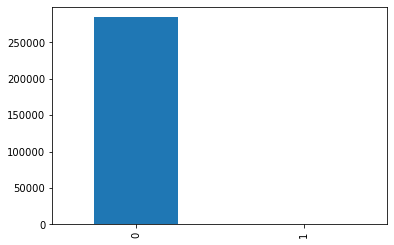

In [19]:
data['Fraud'].value_counts().plot(kind = 'bar') 

In [20]:
data['Fraud'].value_counts()

0    284315
1       492
Name: Fraud, dtype: int64

In [21]:
print("Percentage of total fraud {}".format((data.Time[data['Fraud'] == 1].count() / data.Time[data['Fraud'] == 0].count())*100))

Percentage of total fraud 0.17304750013189596


In [22]:
data[data['Fraud'] ==1].describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Fraud
count,492.000000,492.000000,492.000000,492.000000,492.000000,492.000000,492.000000,492.000000,492.000000,492.000000,...,492.000000,492.000000,492.000000,492.000000,492.000000,492.000000,492.000000,492.000000,492.000000,492.0
mean,80746.806911,-4.771948,3.623778,-7.033281,4.542029,-3.151225,-1.397737,-5.568731,0.570636,-2.581123,...,0.713588,0.014049,-0.040308,-0.105130,0.041449,0.051648,0.170575,0.075667,122.211321,1.0
std,47835.365138,6.783687,4.291216,7.110937,2.873318,5.372468,1.858124,7.206773,6.797831,2.500896,...,3.869304,1.494602,1.579642,0.515577,0.797205,0.471679,1.376766,0.547291,256.683288,0.0
min,406.000000,-30.552380,-8.402154,-31.103685,-1.313275,-22.105532,-6.406267,-43.557242,-41.044261,-13.434066,...,-22.797604,-8.887017,-19.254328,-2.028024,-4.781606,-1.152671,-7.263482,-1.869290,0.000000,1.0
25%,41241.500000,-6.036063,1.188226,-8.643489,2.373050,-4.792835,-2.501511,-7.965295,-0.195336,-3.872383,...,0.041787,-0.533764,-0.342175,-0.436809,-0.314348,-0.259416,-0.020025,-0.108868,1.000000,1.0
50%,75568.500000,-2.342497,2.717869,-5.075257,4.177147,-1.522962,-1.424616,-3.034402,0.621508,-2.208768,...,0.592146,0.048434,-0.073135,-0.060795,0.088371,0.004321,0.394926,0.146344,9.250000,1.0
75%,128483.000000,-0.419200,4.971257,-2.276185,6.348729,0.214562,-0.413216,-0.945954,1.764879,-0.787850,...,1.244611,0.617474,0.308378,0.285328,0.456515,0.396733,0.826029,0.381152,105.890000,1.0
max,170348.000000,2.132386,22.057729,2.250210,12.114672,11.095089,6.474115,5.802537,20.007208,3.353525,...,27.202839,8.361985,5.466230,1.091435,2.208209,2.745261,3.052358,1.779364,2125.870000,1.0


In [23]:
data[data['Fraud'] ==0].describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Fraud
count,284315.000000,284315.000000,284315.000000,284315.000000,284315.000000,284315.000000,284315.000000,284315.000000,284315.000000,284315.000000,...,284315.000000,284315.000000,284315.000000,284315.000000,284315.000000,284315.000000,284315.000000,284315.000000,284315.000000,284315.0
mean,94838.202258,0.008258,-0.006271,0.012171,-0.007860,0.005453,0.002419,0.009637,-0.000987,0.004467,...,-0.001235,-0.000024,0.000070,0.000182,-0.000072,-0.000089,-0.000295,-0.000131,88.291022,0.0
std,47484.015786,1.929814,1.636146,1.459429,1.399333,1.356952,1.329913,1.178812,1.161283,1.089372,...,0.716743,0.723668,0.621541,0.605776,0.520673,0.482241,0.399847,0.329570,250.105092,0.0
min,0.000000,-56.407510,-72.715728,-48.325589,-5.683171,-113.743307,-26.160506,-31.764946,-73.216718,-6.290730,...,-34.830382,-10.933144,-44.807735,-2.836627,-10.295397,-2.604551,-22.565679,-15.430084,0.000000,0.0
25%,54230.000000,-0.917544,-0.599473,-0.884541,-0.850077,-0.689398,-0.766847,-0.551442,-0.208633,-0.640412,...,-0.228509,-0.542403,-0.161702,-0.354425,-0.317145,-0.327074,-0.070852,-0.052950,5.650000,0.0
50%,84711.000000,0.020023,0.064070,0.182158,-0.022405,-0.053457,-0.273123,0.041138,0.022041,-0.049964,...,-0.029821,0.006736,-0.011147,0.041082,0.016417,-0.052227,0.001230,0.011199,22.000000,0.0
75%,139333.000000,1.316218,0.800446,1.028372,0.737624,0.612181,0.399619,0.571019,0.326200,0.598230,...,0.185626,0.528407,0.147522,0.439869,0.350594,0.240671,0.090573,0.077962,77.050000,0.0
max,172792.000000,2.454930,18.902453,9.382558,16.875344,34.801666,73.301626,120.589494,18.709255,15.594995,...,22.614889,10.503090,22.528412,4.584549,7.519589,3.517346,31.612198,33.847808,25691.160000,0.0


In [24]:
#Creating a dataframe with all the fraud transactions
fraud_transaction = data[data['Fraud']==1]

fraud_transaction ['Amount'].describe().round(2)

count     492.00
mean      122.21
std       256.68
min         0.00
25%         1.00
50%         9.25
75%       105.89
max      2125.87
Name: Amount, dtype: float64

Text(0.5, 0, 'Amount ($)')

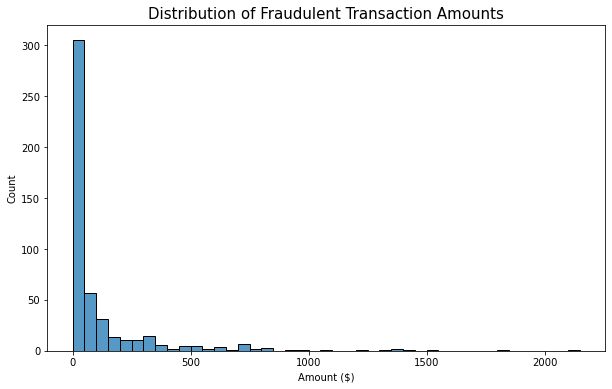

In [25]:
fig_dims = (10, 6)
fig, ax = plt.subplots(figsize=fig_dims)
sns.histplot(x=fraud_transaction['Amount'], binwidth=50)
plt.title("Distribution of Fraudulent Transaction Amounts", fontsize=15)
ax.set_xlabel("Amount ($)")

In [26]:
# plotting correlation heatmap
corr = data.corr().round(2)
corr

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Fraud
Time,1.00,0.12,-0.01,-0.42,-0.11,0.17,-0.06,0.08,-0.04,-0.01,...,0.04,0.14,0.05,-0.02,-0.23,-0.04,-0.01,-0.01,-0.01,-0.01
V1,0.12,1.00,0.00,-0.00,-0.00,0.00,-0.00,-0.00,-0.00,-0.00,...,-0.00,-0.00,0.00,-0.00,-0.00,-0.00,0.00,0.00,-0.23,-0.10
V2,-0.01,0.00,1.00,0.00,-0.00,0.00,0.00,0.00,-0.00,0.00,...,-0.00,0.00,0.00,0.00,-0.00,0.00,-0.00,-0.00,-0.53,0.09
V3,-0.42,-0.00,0.00,1.00,0.00,-0.00,0.00,0.00,-0.00,0.00,...,0.00,-0.00,-0.00,0.00,-0.00,-0.00,0.00,0.00,-0.21,-0.19
V4,-0.11,-0.00,-0.00,0.00,1.00,-0.00,-0.00,-0.00,0.00,0.00,...,-0.00,-0.00,0.00,0.00,0.00,-0.00,0.00,-0.00,0.10,0.13
V5,0.17,0.00,0.00,-0.00,-0.00,1.00,0.00,0.00,0.00,0.00,...,-0.00,0.00,-0.00,-0.00,0.00,0.00,0.00,-0.00,-0.39,-0.09
V6,-0.06,-0.00,0.00,0.00,-0.00,0.00,1.00,0.00,-0.00,0.00,...,0.00,-0.00,0.00,-0.00,0.00,-0.00,-0.00,0.00,0.22,-0.04
V7,0.08,-0.00,0.00,0.00,-0.00,0.00,0.00,1.00,0.00,0.00,...,-0.00,-0.00,-0.00,0.00,-0.00,-0.00,-0.00,-0.00,0.40,-0.19
V8,-0.04,-0.00,-0.00,-0.00,0.00,0.00,-0.00,0.00,1.00,0.00,...,0.00,0.00,0.00,-0.00,-0.00,-0.00,0.00,-0.00,-0.10,0.02
V9,-0.01,-0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,...,0.00,-0.00,-0.00,-0.00,0.00,-0.00,-0.00,0.00,-0.04,-0.10


In [27]:
abscorr = corr[abs(corr['Fraud']) > 0.10].index

In [28]:
abscorr

Index(['V3', 'V4', 'V7', 'V10', 'V11', 'V12', 'V14', 'V16', 'V17', 'V18',
       'Fraud'],
      dtype='object')

In [29]:
data_processed = data.loc[:,['Time', 'Amount', 'V3', 'V4', 'V7', 'V10', 'V11', 'V12', 'V14', 'V16', 'V17', 'V18','Fraud']]

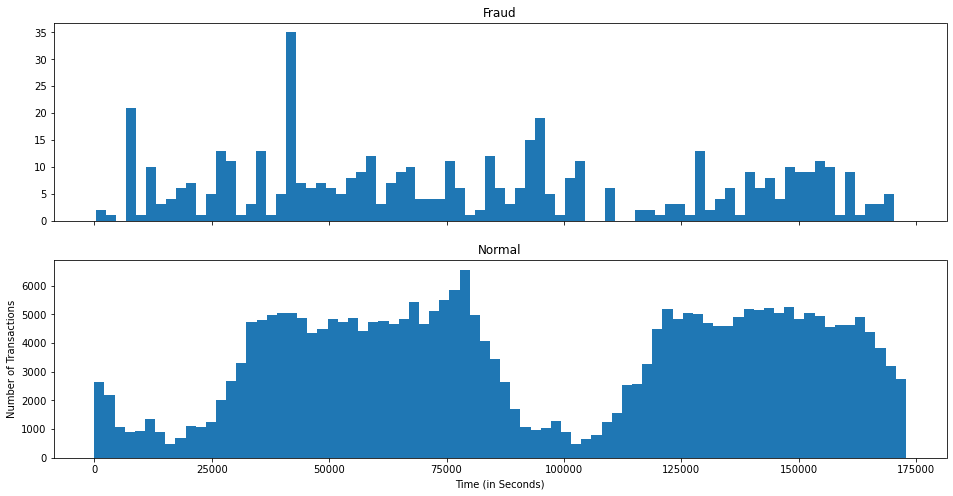

In [30]:
f, (ax1, ax2) = plt.subplots(2, 1, sharex=True, figsize=(16,8))

ax1.hist(data_processed.Time[data_processed.Fraud == 1], bins = 80)
ax1.set_title('Fraud')

ax2.hist(data_processed.Time[data_processed.Fraud == 0], bins = 80)
ax2.set_title('Normal')

plt.xlabel('Time (in Seconds)')
plt.ylabel('Number of Transactions')
plt.show()

 * Fraudulent transactions are more uniformly distributted, but  normal transactions have a cyclical distribution. This makes it easier to detect a fradulent transaction.

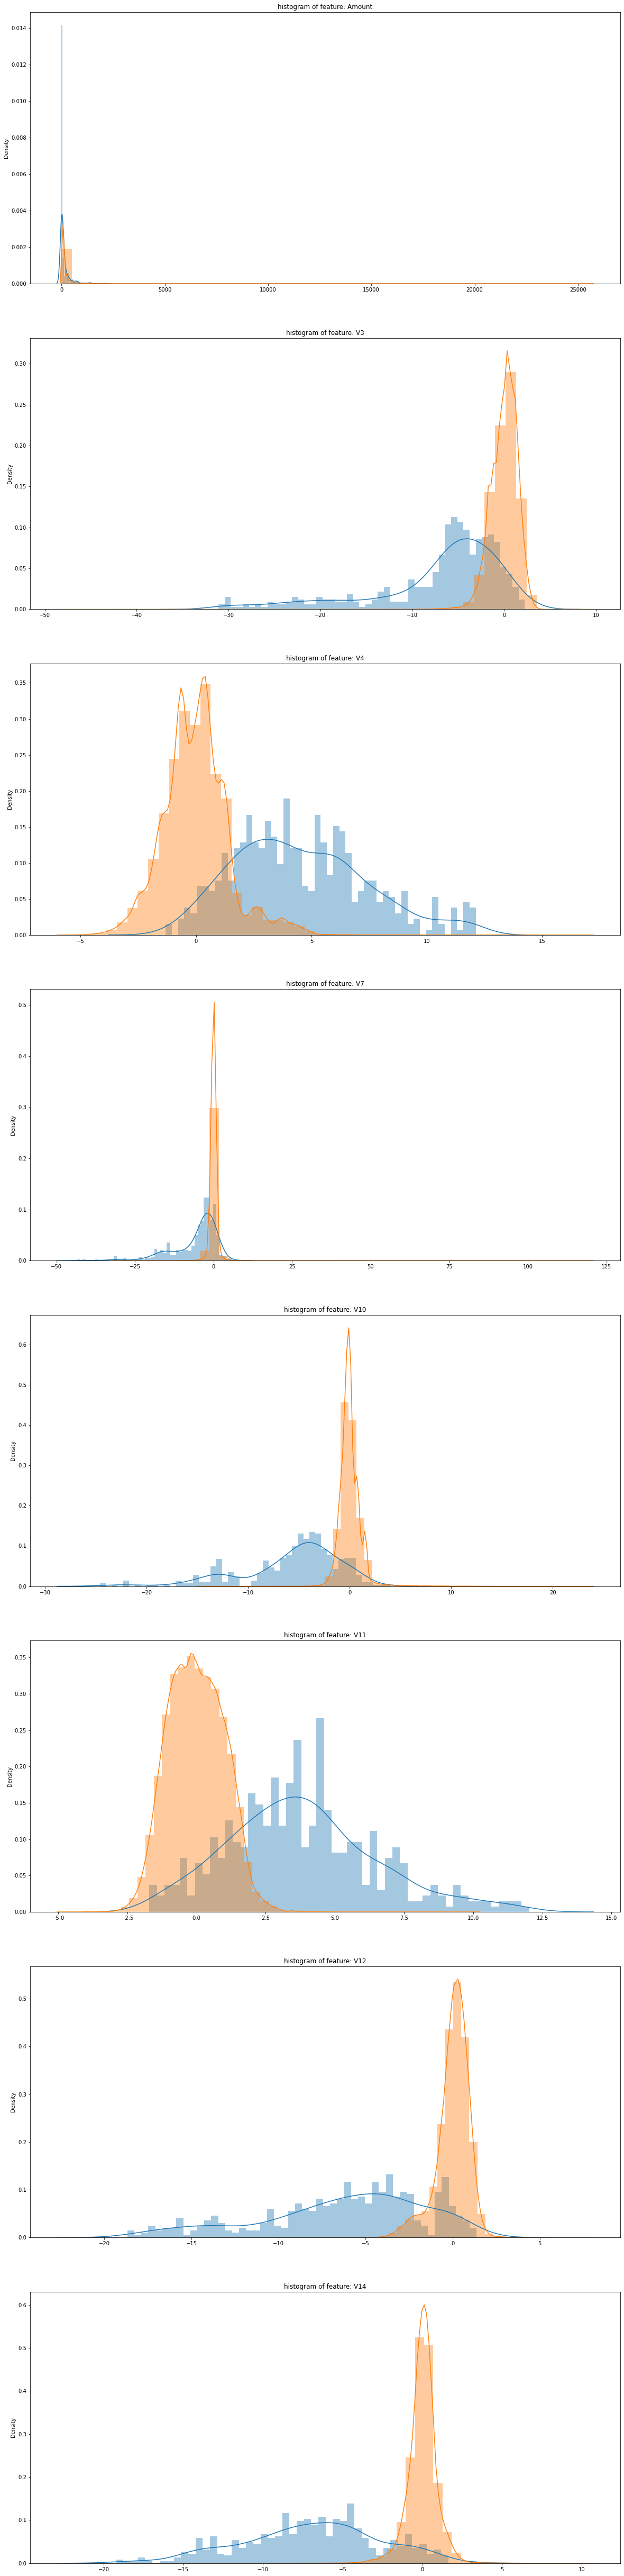

In [31]:
#histogram of features
features = data_processed.iloc[:,1:9].columns

plt.figure(figsize=(20,100))

gs = gridspec.GridSpec(9, 1)

for i, cn in enumerate(data_processed[features]):
    ax = plt.subplot(gs[i])
    sns.distplot(data_processed[cn][data_processed['Fraud'] == 1], bins=50)
    sns.distplot(data_processed[cn][data_processed['Fraud'] == 0], bins=50)
    ax.set_xlabel('')
    ax.set_title('histogram of feature: ' + str(cn))
    
plt.show()

In [32]:

X = data_processed.loc[:, data_processed.columns != 'Fraud']
y = data_processed['Fraud']

In [33]:
#Split the dataset into train and test
from sklearn import model_selection

X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y)

In [34]:
print(np.sum(y))
print(np.sum(y_train))
print(np.sum(y_test))

492
372
120


In [35]:
#Transforming data into gaussian to do power transformation
pt = PowerTransformer()
X_train_scaled = pt.fit_transform(X_train)
X_test_scaled = pt.transform(X_test)

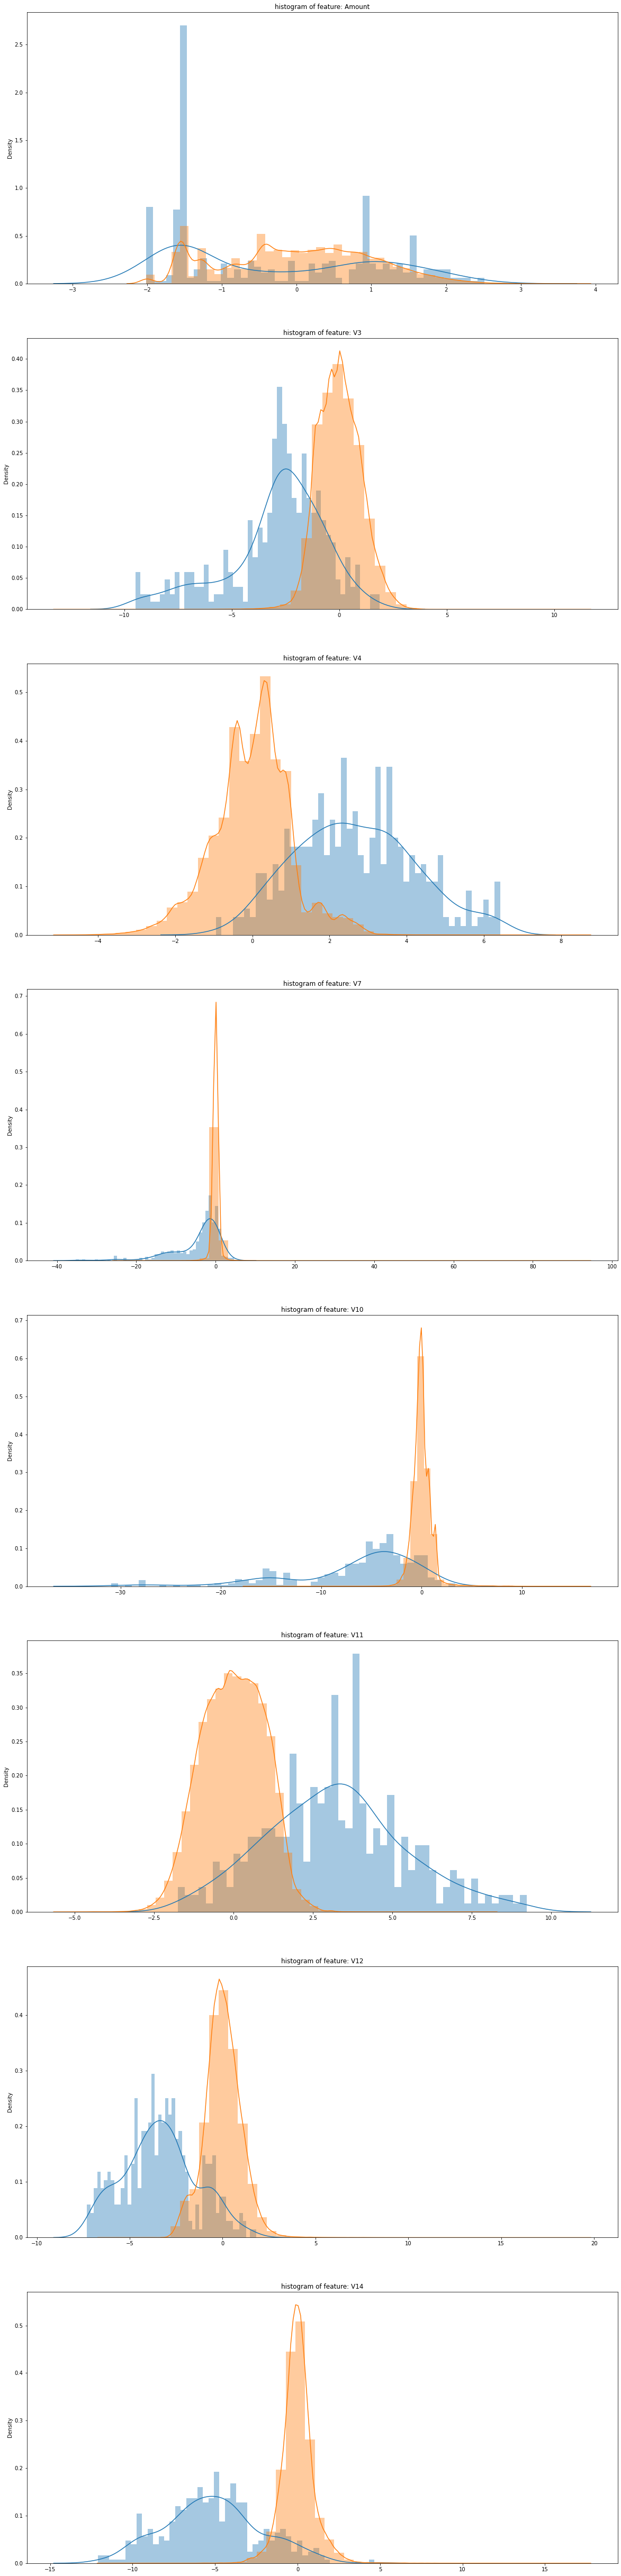

In [36]:
#histogram of features from training dataset after power transformation
X_train_scaled_df = pd.DataFrame(X_train_scaled, columns = X.columns)
X_train_scaled_df['Fraud'] = y_train.values


features_train = X_train_scaled_df.iloc[:,1:9].columns

plt.figure(figsize=(20,100))

gs = gridspec.GridSpec(9, 1)

for i, cn in enumerate(X_train_scaled_df[features_train]):
    ax = plt.subplot(gs[i])
    sns.distplot(X_train_scaled_df[cn][X_train_scaled_df['Fraud'] == 1], bins=50)
    sns.distplot(X_train_scaled_df[cn][X_train_scaled_df['Fraud'] == 0], bins=50)
    ax.set_xlabel('')
    ax.set_title('histogram of feature: ' + str(cn))
    
plt.show()

# Model Building

In [38]:
#Function for plotting the confusin matrix of the model
def confusion_plot(model):

    y_pred = model.predict(X_test_scaled)#Get the confusion matrix
    matrix_cf = confusion_matrix(y_test, y_pred)

    group_names = ['True Neg','False Pos','False Neg','True Pos']

    group_counts = ["{0:0.0f}".format(value) for value in
                    matrix_cf.flatten()]

    group_percentages = ["{0:.2%}".format(value) for value in
                        matrix_cf.flatten()/np.sum(matrix_cf)]
                        
    labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in zip(group_names,group_counts,group_percentages)]



    labels = np.asarray(labels).reshape(2,2)

    return sns.heatmap(matrix_cf, annot=labels, fmt='', cmap='Blues')

In [40]:
#Function for calculatting optimal cut of point

def Find_Optimal_Cutoff(target, predicted):
    
    """ Finding the optimal probability cutoff point for a classification model related to event rate
    Parameters.
    ----------
    Target : Matrix with dependent or target data, where rows are observations.

    Predicted : Matrix with predicted data, where rows are observations.

    Returns
    -------     
    list type, with optimal cutoff value
        
    """
    fpr, tpr, threshold = metrics.roc_curve(target, predicted)
    i = np.arange(len(tpr)) 
    roc = pd.DataFrame({'tf' : pd.Series(tpr-(1-fpr), index=i), 'threshold' : pd.Series(threshold, index=i)})
    roc_t = roc.iloc[(roc.tf-0).abs().argsort()[:1]]

    return list(roc_t['threshold']) 

## Logisitc Regression

In [41]:
lr = LogisticRegression()

#Cross validation
cv = KFold(n_splits=6, random_state=1, shuffle=True)

lr_scores = cross_val_score(lr, X_train_scaled, y_train, scoring='roc_auc', cv=cv, n_jobs=-1)

# report performance
print('Accuracy: %.3f (%.3f)' % (np.mean(lr_scores), np.std(lr_scores)))



Accuracy: 0.972 (0.016)


In [42]:
#Hyperparameteres tuning
grid={"C":np.logspace(-3,3,7), "penalty":["l1","l2"]}# l1 lasso l2 ridge

logreg_cv=GridSearchCV(lr,grid,cv=10)

logreg_cv.fit(X_train_scaled, y_train)

print("tuned hpyerparameters :(best parameters) ",logreg_cv.best_params_)
print("accuracy :",logreg_cv.best_score_)

tuned hpyerparameters :(best parameters)  {'C': 0.1, 'penalty': 'l2'}
accuracy : 0.9991292338657713


########### Confusion Matrix For Logistic regression ###########


<AxesSubplot:>

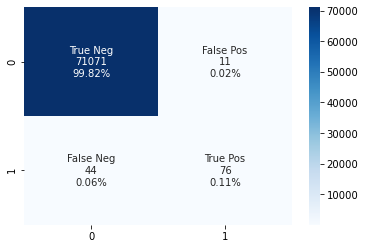

In [43]:
lr = LogisticRegression(**logreg_cv.best_params_)
model_lr = lr.fit(X_train_scaled, y_train)
print("########### Confusion Matrix For Logistic regression ###########")
confusion_plot(model_lr)

## Random Forest

In [44]:
rf = RandomForestClassifier()

#Cross validation
cv = KFold(n_splits=3, random_state=1, shuffle=True)

rf_scores = cross_val_score(rf, X_train_scaled, y_train, scoring='roc_auc', cv=cv, n_jobs=-1)

# report performance
print('Accuracy: %.3f (%.3f)' % (np.mean(rf_scores ), np.std(rf_scores )))


Accuracy: 0.933 (0.015)


In [ ]:
#Hyperparameter tuning for Random Forest

param_grid = {
    'bootstrap': [True],
    'max_depth': [80, 90, 100],
    'max_features': [2, 3],
    'min_samples_leaf': [3, 4, 5],
    'min_samples_split': [8, 10],
    'n_estimators': [100, 200, 300]
}

rf_search = GridSearchCV(estimator = rf, param_grid = param_grid, 
                          cv = 2, n_jobs = -1, verbose = 2)

rf_search.fit(X_train_scaled, y_train)

print("tuned hpyerparameters :(best parameters) ",rf_search.best_params_)
print("accuracy :",rf_search.best_score_)

Fitting 2 folds for each of 108 candidates, totalling 216 fits


In [ ]:
rf = RandomForestClassifier(**rf_search.best_params_)
model_rf = rf.fit(X_train_scaled, y_train)
print("########### Confusion Matrix For Random Forest ###########")
confusion_plot(model_rf)

In [ ]:
metrics.plot_roc_curve(rf, X_train, y_train) 

## XGBOOST

In [ ]:
xgb = XGBClassifier()

#Cross validation
cv = KFold(n_splits=3, random_state=1, shuffle=True)

xgb_scores = cross_val_score(rf, X_train_scaled, y_train, scoring='roc_auc', cv=cv, n_jobs=-1)

# report performance
print('Accuracy: %.3f (%.3f)' % (np.mean(xgb_scores), np.std(xgb_scores)))


In [ ]:
#Hyperparameter tuning for XGBOOST

param_grid = {
    'max_depth': [80, 100],
    'max_leaves': [2, 3],
    'min_child_weight': [3, 4],
    'gamma': [0, 0.5, 1]

}

xgb_search = GridSearchCV(estimator = xgb, param_grid = param_grid, 
                          cv = 2, n_jobs = -1, verbose = 2)

xgb_search.fit(X_train_scaled, y_train)

print("tuned hpyerparameters :(best parameters) ",xgb_search.best_params_)
print("accuracy :",xgb_search.best_score_)

In [ ]:
xgb = XGBClassifier(**xgb_search.best_params_)
model_xgb = xgb.fit(X_train_scaled, y_train)
print("########### Confusion Matrix For XGB Classifier ###########")
confusion_plot(model_xgb)

In [ ]:
metrics.plot_roc_curve(xgb, X_train, y_train) 

## SVM

In [ ]:
svc = SVC()

#Cross validation
cv = KFold(n_splits=3, random_state=1, shuffle=True)

scores_svc = cross_val_score(svc, X_train_scaled, y_train, scoring='roc_auc', cv=cv, n_jobs=-1)

# report performance
print('Accuracy: %.3f (%.3f)' % (np.mean(scores_svc ), np.std(scores_svc )))


In [ ]:
#Hyperparameter tuning for SVC

param_grid = {'C': [0.1, 1, 10],
              'gamma': [1, 0.1, 0.01, 0.001],
              'kernel': ['rbf', 'linear']}
 

svc_search = GridSearchCV(estimator = svc, param_grid = param_grid, 
                          cv = 2, n_jobs = -1, verbose = 2)

svc_search.fit(X_train_scaled, y_train)

print("tuned hpyerparameters :(best parameters) ",svc_search.best_params_)
print("accuracy :",svc_search.best_score_)

In [ ]:
svc = SVC(**svc_search.best_params_)
model_svc = svc.fit(X_train_scaled, y_train)
print("########### Confusion Matrix For SVC Classifier ###########")
confusion_plot(model_svc)

## Decision Tree

In [ ]:
dt = DecisionTreeClassifier()
#Cross validation
cv = KFold(n_splits=6, random_state=1, shuffle=True)

scores_dt = cross_val_score(dt, X_train_scaled, y_train, scoring='roc_auc', cv=cv, n_jobs=-1)

# report performance
print('Accuracy: %.3f (%.3f)' % (np.mean(scores_dt ), np.std(scores_dt )))

In [ ]:
#Hyperparameter tuning for SVC

param_grid = {
    'splitter': ['best', 'random'],
    'max_depth': [80, 90, 100],
    'max_features': [2, 3],
    'min_samples_leaf': [3, 4, 5],
    'min_samples_split': [8, 10],
    'class_weight': ['balanced']
}

 

dt_search = GridSearchCV(estimator = dt, param_grid = param_grid, 
                          cv = 2, n_jobs = -1, verbose = 2)

dt_search.fit(X_train_scaled, y_train)

print("tuned hpyerparameters :(best parameters) ", dt_search.best_params_)
print("accuracy :",dt_search.best_score_)

In [ ]:
dt = DecisionTreeClassifier(**dt_search.best_params_)
model_dt = dt.fit(X_train_scaled, y_train)
print("########### Confusion Matrix For Decision tree Classifier ###########")
confusion_plot(model_dt)

## Prediction

In [ ]:
clf = XGBClassifier(**xgb_search.best_params_)
model = clf.fit(X_train_scaled, y_train)

y_pred = model.predict(X_test_scaled)

## Feature Impotance

In [ ]:
var_imp = []
for i in clf.feature_importances_:
    var_imp.append(i)
print('Top var =', var_imp.index(np.sort(clf.feature_importances_)[-1])+1)
print('2nd Top var =', var_imp.index(np.sort(clf.feature_importances_)[-2])+1)
print('3rd Top var =', var_imp.index(np.sort(clf.feature_importances_)[-3])+1)

# Variable on Index-16 and Index-13 seems to be the top 2 variables
top_var_index = var_imp.index(np.sort(clf.feature_importances_)[-1])
second_top_var_index = var_imp.index(np.sort(clf.feature_importances_)[-2])

X_train_1 = X_train.to_numpy()[np.where(y_train==1.0)]
X_train_0 = X_train.to_numpy()[np.where(y_train==0.0)]

np.random.shuffle(X_train_0)

import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['figure.figsize'] = [20, 20]

plt.scatter(X_train_1[:, top_var_index], X_train_1[:, second_top_var_index], label='Actual Class-1 Examples')
plt.scatter(X_train_0[:X_train_1.shape[0], top_var_index], X_train_0[:X_train_1.shape[0], second_top_var_index],
            label='Actual Class-0 Examples')
plt.legend()

## Model building with balancing class

## Taking top two models

In [ ]:
xgb = XGBClassifier()
rf = RandomForestClassifier()

## Ramdom Oversampling

In [ ]:
ro = over_sampling.RandomOverSampler(sampling_strategy='minority')

X_train_ro, y_train_ro = ro.fit_resample(X_train_scaled, y_train)

## XG- Boost

In [ ]:
#Hyperparameter tuning for XGBOOST

param_grid = {
    'max_depth': [80, 100],
    'max_leaves': [2, 3],
    'min_child_weight': [3, 4],
    'gamma': [0, 0.5, 1]

}

xgb_search = GridSearchCV(estimator = xgb, param_grid = param_grid, 
                          cv = 2, n_jobs = -1, verbose = 2)

xgb_search.fit(X_train_ro, y_train_ro)

print("tuned hpyerparameters :(best parameters) ",xgb_search.best_params_)
print("accuracy :",xgb_search.best_score_)

In [ ]:
xgb = XGBClassifier(**xgb_search.best_params_)
model_xgb = xgb.fit(X_train_ro, y_train_ro)
metrics.plot_roc_curve(xgb, X_train_ro, y_train_ro) 

In [ ]:
print("########### Confusion Matrix For XGB Classifier ###########")
confusion_plot(model_xgb)

## Random Forest

In [ ]:
#Hyperparameter tuning for Random Forest

param_grid = {
    'bootstrap': [True],
    'max_depth': [80, 90, 100],
    'max_features': [2, 3],
    'min_samples_leaf': [3, 4, 5],
    'min_samples_split': [8, 10],
    'n_estimators': [100, 200, 300]
}

rf_search = GridSearchCV(estimator = rf, param_grid = param_grid, 
                          cv = 2, n_jobs = -1, verbose = 2)

rf_search.fit(X_train_ro, y_train_ro)

print("tuned hpyerparameters :(best parameters) ",rf_search.best_params_)
print("accuracy :",rf_search.best_score_)

In [ ]:
print("########### Confusion Matrix For Random Forest ###########")
confusion_plot(model_rf)

In [ ]:
metrics.plot_roc_curve(rf, X_train_ro, y_train_ro)

## Class Ditribution after applying SMOTE

In [ ]:
import warnings
warnings.filterwarnings("ignore")


sm = over_sampling.SMOTE(random_state=0)
X_train_smote, y_train_smote = sm.fit_resample(X_train, y_train)
# Artificial minority samples and corresponding minority labels from SMOTE are appended
# below X_train and y_train respectively
# So to exclusively get the artificial minority samples from SMOTE, we do
X_train_smote_1 = X_train_smote[X_train.shape[0]:]

X_train_1 = X_train.to_numpy()[np.where(y_train==1.0)]
X_train_0 = X_train.to_numpy()[np.where(y_train==0.0)]


plt.rcParams['figure.figsize'] = [20, 20]
fig = plt.figure()

plt.subplot(3, 1, 1)
plt.scatter(X_train_1[:, 0], X_train_1[:, 1], label='Actual Class-1 Examples')
plt.legend()

plt.subplot(3, 1, 2)
plt.scatter(X_train_1[:, 0], X_train_1[:, 1], label='Actual Class-1 Examples')
plt.scatter(X_train_smote_1.iloc[:X_train_1.shape[0], 0], X_train_smote_1.iloc[:X_train_1.shape[0], 1],
            label='Artificial SMOTE Class-1 Examples')
plt.legend()

plt.subplot(3, 1, 3)
plt.scatter(X_train_1[:, 0], X_train_1[:, 1], label='Actual Class-1 Examples')
plt.scatter(X_train_0[:X_train_1.shape[0], 0], X_train_0[:X_train_1.shape[0], 1], label='Actual Class-0 Examples')
plt.legend()

### XGBOOST

In [ ]:
#Hyperparameter tuning for XGBOOST

param_grid = {
    'max_depth': [80, 100],
    'max_leaves': [2, 3],
    'min_child_weight': [3, 4],
    'gamma': [0, 0.5, 1]

}

xgb_search = GridSearchCV(estimator = xgb, param_grid = param_grid, 
                          cv = 2, n_jobs = -1, verbose = 2)

xgb_search.fit(X_train_smote, y_train_smote)

print("tuned hpyerparameters :(best parameters) ",xgb_search.best_params_)
print("accuracy :",xgb_search.best_score_)

In [ ]:
xgb = XGBClassifier(**xgb_search.best_params_)
model_xgb = xgb.fit(X_train_ro, y_train_ro)
metrics.plot_roc_curve(xgb, X_train_smote, y_train_smote) 

In [ ]:
print("########### Confusion Matrix For XGB Classifier ###########")
confusion_plot(model_xgb)

### Random Forest

In [ ]:
#Hyperparameter tuning for Random Forest

param_grid = {
    'bootstrap': [True],
    'max_depth': [80, 90, 100],
    'max_features': [2, 3],
    'min_samples_leaf': [3, 4, 5],
    'min_samples_split': [8, 10],
    'n_estimators': [100, 200, 300]
}

rf_search = GridSearchCV(estimator = rf, param_grid = param_grid, 
                          cv = 2, n_jobs = -1, verbose = 2)

rf_search.fit(X_train_smote, y_train_smote)

print("tuned hpyerparameters :(best parameters) ",rf_search.best_params_)
print("accuracy :",rf_search.best_score_)

In [ ]:
rf = RandomForestClassifier(**rf_search.best_params_)
model_rf = rf.fit(X_train_smote, y_train)
print("########### Confusion Matrix For Random Forest ###########")
confusion_plot(model_rf)

In [ ]:
metrics.plot_roc_curve(rf, X_train_ro, y_train_ro)

## Class ditribution after applying ADASYN

In [ ]:
import warnings
warnings.filterwarnings("ignore")

from imblearn import over_sampling

ada = over_sampling.ADASYN(random_state=0)
X_train_adasyn, y_train_adasyn = ada.fit_resample(X_train, y_train)
# Artificial minority samples and corresponding minority labels from ADASYN are appended
# below X_train and y_train respectively
# So to exclusively get the artificial minority samples from ADASYN, we do
X_train_adasyn_1 = X_train_adasyn[X_train.shape[0]:]

X_train_1 = X_train.to_numpy()[np.where(y_train==1.0)]
X_train_0 = X_train.to_numpy()[np.where(y_train==0.0)]



import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['figure.figsize'] = [20, 20]
fig = plt.figure()

plt.subplot(3, 1, 1)
plt.scatter(X_train_1[:, 0], X_train_1[:, 1], label='Actual Class-1 Examples')
plt.legend()

plt.subplot(3, 1, 2)
plt.scatter(X_train_1[:, 0], X_train_1[:, 1], label='Actual Class-1 Examples')
plt.scatter(X_train_adasyn_1.iloc[:X_train_1.shape[0], 0], X_train_adasyn_1.iloc[:X_train_1.shape[0], 1],
            label='Artificial ADASYN Class-1 Examples')
plt.legend()

plt.subplot(3, 1, 3)
plt.scatter(X_train_1[:, 0], X_train_1[:, 1], label='Actual Class-1 Examples')
plt.scatter(X_train_0[:X_train_1.shape[0], 0], X_train_0[:X_train_1.shape[0], 1], label='Actual Class-0 Examples')
plt.legend()

### XGBoost

In [ ]:
#Hyperparameter tuning for XGBOOST

param_grid = {
    'max_depth': [80, 100],
    'max_leaves': [2, 3],
    'min_child_weight': [3, 4],
    'gamma': [0, 0.5, 1]

}

xgb_search = GridSearchCV(estimator = xgb, param_grid = param_grid, 
                          cv = 2, n_jobs = -1, verbose = 2)

xgb_search.fit(X_train_smote, y_train_smote)

print("tuned hpyerparameters :(best parameters) ",xgb_search.best_params_)
print("accuracy :",xgb_search.best_score_)

In [ ]:
xgb = XGBClassifier(**xgb_search.best_params_)
model_xgb = xgb.fit(X_train_ro, y_train_ro)
metrics.plot_roc_curve(xgb, X_train_adasyn, y_train_adasyn) 

In [ ]:
print("########### Confusion Matrix For XGB Classifier ###########")
confusion_plot(model_xgb)

## Random Forest

In [ ]:
#Hyperparameter tuning for Random Forest

param_grid = {
    'bootstrap': [True],
    'max_depth': [80, 90, 100],
    'max_features': [2, 3],
    'min_samples_leaf': [3, 4, 5],
    'min_samples_split': [8, 10],
    'n_estimators': [100, 200, 300]
}

rf_search = GridSearchCV(estimator = rf, param_grid = param_grid, 
                          cv = 2, n_jobs = -1, verbose = 2)

rf_search.fit(X_train_smote, y_train_smote)

print("tuned hpyerparameters :(best parameters) ",rf_search.best_params_)
print("accuracy :",rf_search.best_score_)

In [ ]:
rf = RandomForestClassifier(**rf_search.best_params_)
model_rf = rf.fit(X_train_scaled, y_train)
print("########### Confusion Matrix For Random Forest ###########")
confusion_plot(model_rf)

In [ ]:
metrics.plot_roc_curve(rf, X_train_ro, y_train_ro)

## Final Prediciton and Feature impotance

### Final Predicition

In [ ]:
clf = XGBClassifier(**xgb_search.best_params_)
clf.fit(X_train_smote, y_train_smote)

### Feature importance

In [ ]:
var_imp = []
for i in clf.feature_importances_:
    var_imp.append(i)
print('Top var =', var_imp.index(np.sort(clf.feature_importances_)[-1])+1)
print('2nd Top var =', var_imp.index(np.sort(clf.feature_importances_)[-2])+1)
print('3rd Top var =', var_imp.index(np.sort(clf.feature_importances_)[-3])+1)

# Variable on Index-13 and Index-9 seems to be the top 2 variables
top_var_index = var_imp.index(np.sort(clf.feature_importances_)[-1])
second_top_var_index = var_imp.index(np.sort(clf.feature_importances_)[-2])

X_train_1 = X_train.to_numpy()[np.where(y_train==1.0)]
X_train_0 = X_train.to_numpy()[np.where(y_train==0.0)]

np.random.shuffle(X_train_0)

import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['figure.figsize'] = [20, 20]

plt.scatter(X_train_1[:, top_var_index], X_train_1[:, second_top_var_index], label='Actual Class-1 Examples')
plt.scatter(X_train_0[:X_train_1.shape[0], top_var_index], X_train_0[:X_train_1.shape[0], second_top_var_index],
            label='Actual Class-0 Examples')
plt.legend()

#### Print the FPR,TPR & select the best threshold from the roc curve

In [ ]:
print('Train auc =', metrics.roc_auc_score(y_test, clf.predict_proba(X_test_scaled)[:, 1]))

fpr, tpr, thresholds = metrics.roc_curve(y_test, clf.predict_proba(X_test_scaled)[:, 1])
threshold = thresholds[np.argmax(tpr-fpr)]
print(threshold)